In [2]:
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
from sklearn.ensemble import RandomForestClassifier as randFc;
from sklearn.metrics import accuracy_score;
import seaborn as sns;

In [3]:
# The train data set we are given
train = pd.read_csv('train.csv');
# The data set we gotta test
test = pd.read_csv('test.csv');
# show data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
col_surv=train.pop('Survived');
col_surv.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [5]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
my_model=train;

my_model.head()
unwanted_df = pd.DataFrame()
unwanted = ['PassengerId', 'Name', 'Sex', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'];
for x in unwanted:
    unwanted_df[x] = my_model[x];
unwanted_df.head()

,PassengerId,Name,Sex,Parch,Ticket,Fare,Cabin,Embarked
0,1,"Braund, Mr. Owen Harris",male,0,A/5 21171,7.2500,NaN,S
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,0,STON/O2. 3101282,7.9250,NaN,S
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,113803,53.1000,C123,S
4,5,"Allen, Mr. William Henry",male,0,373450,8.0500,NaN,S


In [28]:
my_model.drop(['PassengerId', 'Name', 'Sex', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)
my_model['Fare'] = unwanted_df['Fare'];
my_model['Parch'] = unwanted_df['Parch'];
my_model.head()

,Pclass,Age,SibSp,Fare,Parch
0,3,22.0,1,7.2500,0
1,1,38.0,1,71.2833,0
2,3,26.0,0,7.9250,0
3,1,35.0,1,53.1000,0
4,3,35.0,0,8.0500,0


In [8]:
male = unwanted_df['Sex'];
isMale = list();
for i in male:
    if i == 'male':
        isMale.append(1);
    else :
        isMale.append(0);
print(isMale)

[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 

In [38]:
my_model['Sex'] = isMale;
my_model.head()

,Pclass,Age,SibSp,Fare,Parch,Sex
0,3,22.0,1,7.2500,0,1
1,1,38.0,1,71.2833,0,0
2,3,26.0,0,7.9250,0,0
3,1,35.0,1,53.1000,0,0
4,3,35.0,0,8.0500,0,1


29.69911764705882
   Pclass   Age  SibSp     Fare  Parch  Sex
0       3  22.0      1   7.2500      0    1
1       1  38.0      1  71.2833      0    0
2       3  26.0      0   7.9250      0    0
3       1  35.0      1  53.1000      0    0
4       3  35.0      0   8.0500      0    1


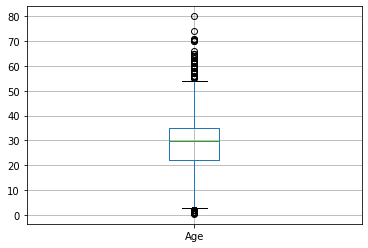

In [39]:
print(my_model['Age'].mean())
print(my_model.head())
my_model.boxplot(column=['Age'], return_type='axes')

In [40]:
my_model['Age'].fillna(my_model.Age.mean(), inplace=True);
my_model['Fare'].fillna(my_model.Fare.mean(), inplace=True);
my_model.tail()
my_model.head()

,Pclass,Age,SibSp,Fare,Parch,Sex
0,3,22.0,1,7.2500,0,1
1,1,38.0,1,71.2833,0,0
2,3,26.0,0,7.9250,0,0
3,1,35.0,1,53.1000,0,0
4,3,35.0,0,8.0500,0,1


In [41]:
test['Age'].fillna(test.Age.mean(), inplace=True)
test['Fare'].fillna(test.Fare.mean(), inplace=True)
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,30.27259,1,1,2668,22.3583,NaN,C


In [42]:
model = randFc(n_estimators=100)
model.fit(my_model, col_surv)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
print("Train Accuracy = " + str(accuracy_score(col_surv, model.predict(my_model))));
test.info()

Train Accuracy = 0.9820426487093153
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [44]:
col_model = ['Pclass', 'Age', 'SibSp', 'Sex', 'Fare', 'Parch'];
test_this = test[col_model].copy()
maleTest = test_this.pop("Sex");
isMaleTest = [];
for i in maleTest:
    if i == 'male':
        isMaleTest.append(1);
    else :
        isMaleTest.append(0);
test_this["Sex"] = isMaleTest;
test_this.describe()

,Pclass,Age,SibSp,Fare,Parch,Sex
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,35.627188,0.392344,0.636364
std,0.841838,12.634534,0.896760,55.840500,0.981429,0.481622
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,7.895800,0.000000,0.000000
50%,3.000000,30.272590,0.000000,14.454200,0.000000,1.000000
75%,3.000000,35.750000,1.000000,31.500000,0.000000,1.000000
max,3.000000,76.000000,8.000000,512.329200,9.000000,1.000000


In [45]:
prediction_test = model.predict(test_this)
prediction_test

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [46]:
submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": prediction_test
})
submission.to_csv('titanic_pred_Age.csv', index=False)